In [ ]:
!pip install networkx matplotlib

### TSP Input and formulation

In [ ]:
def input(filename):
  with open(filename,"r") as f:
    lines=f.readlines()

  line=lines[0].strip()
  line=line.split(" ")
  n=int(line[0])
  e=int(line[1])

  adj=[[] for i in range(0,n)]
  for i in range(2,len(lines)):
    line=lines[i].strip()
    # Skip empty lines
    if not line:
        continue
    line=line.split(" ")
    x=int(line[0])
    y=int(line[1])
    cost=int(line[2])
    adj[x].append([y,cost])
    adj[y].append([x,cost])

  return n,e,adj
  #no of vertex, edge and adjacency List

### Brute Force Solution O(n!)


In [ ]:
import itertools
import sys

def brute_force_tsp(n, adj):
    """
    Brute force solution for TSP.

    Args:
        n: Number of vertices.
        adj: Adjacency list representing the graph.

    Returns:
        The minimum cost of the TSP tour, or infinity if no tour exists.
    """
    # Create a distance matrix from the adjacency list
    # Initialize with infinity, 0 for self loops
    dist = [[sys.maxsize] * n for _ in range(n)]
    for i in range(n):
        dist[i][i] = 0

    # Fill in distances from the adjacency list
    for u in range(n):
        for neighbor, cost in adj[u]:
            dist[u][neighbor] = cost
            # Assuming an undirected graph, add the reverse edge as well
            dist[neighbor][u] = cost

    min_cost = sys.maxsize
    best_path = None

    # Iterate through all permutations of vertices (excluding the starting vertex)
    for path in itertools.permutations(range(1, n)):
        current_path = [0] + list(path) + [0]  # Add starting and ending vertex (0)
        current_cost = 0
        valid_path = True

        # Calculate the cost of the current path
        for i in range(n):
            u = current_path[i]
            v = current_path[i+1]
            if dist[u][v] == sys.maxsize:
                valid_path = False
                break
            current_cost += dist[u][v]

        # Update minimum cost if the current path is valid and has lower cost
        if valid_path and current_cost < min_cost:
            min_cost = current_cost
            best_path = current_path

    return min_cost, best_path


____

### Hill Climbing

In [ ]:
import random
import math

def route_length(route, adj):
    """Calculate total distance of the route (round trip) using adjacency list."""
    length = 0
    for i in range(len(route)):
        u = route[i]
        v = route[(i + 1) % len(route)]
        found_edge = False
        for neighbor, cost in adj[u]:
            if neighbor == v:
                length += cost
                found_edge = True
                break
        if not found_edge:
            return float('inf') # Return infinity if there's no direct edge
    return length


def hill_climb(cities, adj, max_iterations=1000):
    # Start with random route
    current_route = cities[:]
    random.shuffle(current_route)
    current_cost = route_length(current_route, adj)

    for _ in range(max_iterations):
        # Neighbor: swap two cities
        i, j = random.sample(range(len(cities)), 2)
        neighbor = current_route[:]
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        neighbor_cost = route_length(neighbor, adj)

        # Accept if better
        if neighbor_cost < current_cost:
            current_route, current_cost = neighbor, neighbor_cost
        #print(neighbor)
    return current_route, current_cost



### Simulated Annealing

In [ ]:
import random
import math
import sys

def simulated_annealing_tsp(n, adj, initial_temperature, cooling_rate, max_iterations):

    cities = list(range(n))
    current_route = cities[:]
    random.shuffle(current_route)
    current_cost = route_length(current_route, adj)

    best_route = current_route[:]
    best_cost = current_cost

    current_temperature = initial_temperature

    for i in range(max_iterations):
        # Generate a neighboring route by swapping two random cities
        neighbor = current_route[:]
        i, j = random.sample(range(n), 2)
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        neighbor_cost = route_length(neighbor, adj)

        # Calculate the difference in cost
        cost_difference = neighbor_cost - current_cost

        # Accept the neighbor if it's better or with a certain probability
        if cost_difference < 0:
            current_route, current_cost = neighbor, neighbor_cost
        else:
            acceptance_probability = math.exp(-cost_difference / current_temperature)
            if random.random() < acceptance_probability:
                current_route, current_cost = neighbor, neighbor_cost

        # Update the best route found so far
        if current_cost < best_cost:
            best_route, best_cost = current_route, current_cost

        # Cool down the temperature
        current_temperature *= cooling_rate

    return best_route, best_cost

___

Graph Visualization:


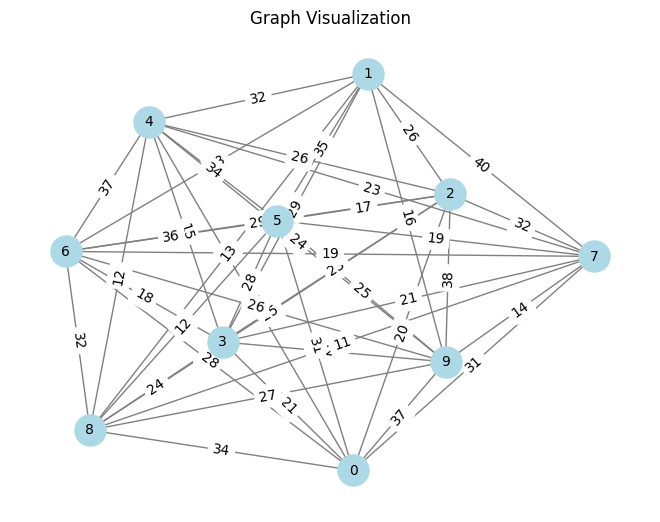


Hill Climb Stats:
Best Route (Hill Climbing): [6, 3, 4, 0, 2, 5, 8, 1, 9, 7, 6]
Best Cost (Hill Climbing): 160
Simulated Annealing Stats:
Best Route (Simulated Annealing): [5, 2, 1, 9, 7, 6, 3, 0, 4, 8, 5]
Best Cost (Simulated Annealing): 171

Brute Force Stats:

--- Performance Comparison ---
Simulated Annealing Best Cost: 171
Hill Climbing Best Cost: 160


In [ ]:
if __name__ == "__main__":
    # n = 4
    # adj = [
    #     [[1, 10], [2, 15], [3, 20]],
    #     [[0, 10], [2, 35], [3, 25]],
    #     [[0, 15], [1, 35], [3, 30]],
    #     [[0, 20], [1, 25], [2, 30]]
    # ]
    n,e,adj=input("input.txt")
    print("Graph Visualization:")
    visualize_graph(n, adj)


    cities = list(range(n))
    print("\nHill Climb Stats:")

    # 2. Call the hill_climb function

    hc_max_iterations = 100000 # Number of iterations for Hill Climbing
    hc_best_route, hc_best_cost = hill_climb(cities, adj, hc_max_iterations)
    # Add the starting city to the end for a complete tour representation
    hc_best_route_display = hc_best_route + [hc_best_route[0]]


    if hc_best_cost == float('inf'):
        print("No valid TSP tour found by Hill Climbing.")
    else:
        print(f"Best Route (Hill Climbing): {hc_best_route_display}")
        print(f"Best Cost (Hill Climbing): {hc_best_cost}")


    # 3. Define parameters for the simulated annealing algorithm
    initial_temperature = 1000
    cooling_rate = 0.95
    sa_max_iterations = 100000

    print("Simulated Annealing Stats:")
    # 4. Call the simulated_annealing_tsp function
    sa_best_route, sa_best_cost = simulated_annealing_tsp(n, adj, initial_temperature, cooling_rate, sa_max_iterations)
    # 5. Add the starting city to the end for a complete tour representation
    sa_best_route_display = sa_best_route + [sa_best_route[0]]

    if sa_best_cost == float('inf'):
        print("No valid TSP tour found by Simulated Annealing.")
    else:
        print(f"Best Route (Simulated Annealing): {sa_best_route_display}")
        print(f"Best Cost (Simulated Annealing): {sa_best_cost}")

    print("\nBrute Force Stats:")

    # 6. Add comments or print statements to briefly analyze and compare the performance
    print("\n--- Performance Comparison ---")
    # print(f"Brute Force Minimum Cost: {bf_min_cost}")
    print(f"Simulated Annealing Best Cost: {sa_best_cost}")
    print(f"Hill Climbing Best Cost: {hc_best_cost}")

    output("output.txt", hc_best_route_display, hc_best_cost, sa_best_route_display, sa_best_cost)

In [ ]:
def output(filename, hc_best_route, hc_best_cost, sa_best_route, sa_best_cost):

    with open(filename, "w") as f:
        f.write("--- TSP Algorithm Stats ---\n")
        f.write("\nHill Climbing Stats:\n")
        if hc_best_cost == float('inf'):
            f.write("No valid TSP tour found by Hill Climbing.\n")
        else:
            f.write(f"Best Route: {hc_best_route}\n")
            f.write(f"Best Cost: {hc_best_cost}\n")

        f.write("\nSimulated Annealing Stats:\n")
        if sa_best_cost == float('inf'):
            f.write("No valid TSP tour found by Simulated Annealing.\n")
        else:
            f.write(f"Best Route: {sa_best_route}\n")
            f.write(f"Best Cost: {sa_best_cost}\n")



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(n, adj):
    """
    Visualizes a graph from an adjacency list using NetworkX.

    Args:
        n: Number of vertices.
        adj: Adjacency list representing the graph (format: [[neighbor, cost], ...]).
    """
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(n))

    # Add edges with weights
    for u in range(n):
        for v, cost in adj[u]:
            G.add_edge(u, v, weight=cost)

    # Draw the graph
    pos = nx.spring_layout(G)  # You can use different layouts
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')

    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graph Visualization")
    plt.show()

